In [1]:
import sys
import os
sys.path.append('/pscratch/sd/p/pvashi/irp/irp_mace_l_2/irp/density/cluster_analysis/')
sys.path.append('/pscratch/sd/p/pvashi/irp/irp_mace_l_2/irp/density/cluster_analysis/Pu_cluster_only/')

from plot_utils import plot_cluster_size_distribution, analyze_bond_network, plot_rdfs, plot_3d_cluster_with_graph
from bondmodifier_utils import canonical_cluster_workflow, import_file, summarize_bonds

# Import standardized plotting functions
from standardized_plots import (
    plot_coordination_histograms as std_plot_coordination_histograms,
    plot_graph_structure,
    plot_cluster_size_distribution as std_plot_cluster_size_distribution,
    plot_3d_graph_components,
    plot_3d_graph_components_pu_only as std_plot_3d_graph_components_pu_only,
    setup_plot_style,
    get_standard_colors,
    extract_positions_from_data,
    extract_names_from_data,
)

import numpy as np
import networkx as nx


/pscratch/sd/p/pvashi/irp/irp_mace_l_2/irp/density/cluster_analysis/bondmodifier_utils.py:36: UserWarning: A NumPy version >=1.23.5 and <2.3.0 is required for this version of SciPy (detected version 2.3.2)
  from scipy.signal import find_peaks


In [2]:
import glob
file_list = glob.glob('/pscratch/sd/p/pvashi/irp/irp_mace_l_2/irp/density/NaCl-PuCl3/x*/T*/dump.lammpstrj')

In [3]:
file_list 

['/pscratch/sd/p/pvashi/irp/irp_mace_l_2/irp/density/NaCl-PuCl3/x0.40/T1200K/dump.lammpstrj',
 '/pscratch/sd/p/pvashi/irp/irp_mace_l_2/irp/density/NaCl-PuCl3/x0.40/T1100K/dump.lammpstrj',
 '/pscratch/sd/p/pvashi/irp/irp_mace_l_2/irp/density/NaCl-PuCl3/x0.40/T800K/dump.lammpstrj',
 '/pscratch/sd/p/pvashi/irp/irp_mace_l_2/irp/density/NaCl-PuCl3/x0.40/T1300K/dump.lammpstrj',
 '/pscratch/sd/p/pvashi/irp/irp_mace_l_2/irp/density/NaCl-PuCl3/x0.40/T1000K/dump.lammpstrj',
 '/pscratch/sd/p/pvashi/irp/irp_mace_l_2/irp/density/NaCl-PuCl3/x0.40/T1250K/dump.lammpstrj',
 '/pscratch/sd/p/pvashi/irp/irp_mace_l_2/irp/density/NaCl-PuCl3/x0.40/T900K/dump.lammpstrj',
 '/pscratch/sd/p/pvashi/irp/irp_mace_l_2/irp/density/NaCl-PuCl3/x0.27/T1200K/dump.lammpstrj',
 '/pscratch/sd/p/pvashi/irp/irp_mace_l_2/irp/density/NaCl-PuCl3/x0.27/T1100K/dump.lammpstrj',
 '/pscratch/sd/p/pvashi/irp/irp_mace_l_2/irp/density/NaCl-PuCl3/x0.27/T800K/dump.lammpstrj',
 '/pscratch/sd/p/pvashi/irp/irp_mace_l_2/irp/density/NaCl-PuCl3

In [4]:
# User inputs
infile = "/pscratch/sd/p/pvashi/irp/irp_mace_l_2/irp/density/NaCl-PuCl3/x0.27/T1100K/dump.lammpstrj"
rdf_samples = 100  # adjust for speed/accuracy


In [ ]:
import ase 

In [5]:
pipe = import_file(infile, multiple_frames=True)
print(f"Loaded trajectory with {pipe.source.num_frames} frames")

# Set up standardized plotting style
setup_plot_style()
print("Standardized plotting style configured")

# Still construct all bonds (Voronoi and NaCl) but only cluster Pu atoms
result = canonical_cluster_workflow(
    pipeline=pipe,
    # disable_pair=("Na", "Cl"),  # Keep all bonds for construction
    metals=["Pu"],  # Only Pu for cluster analysis, ignoring Na nodes
    anion="Cl",
    rdf_samples=rdf_samples,
)

r = result["rdf"]
cutoffs = result["pair_cutoffs"]
print("Pairwise cutoffs:", cutoffs)



Loaded trajectory with 14615 frames
Standardized plotting style configured
Pairwise cutoffs: {('Pu', 'Cl'): 3.2600000000000002, ('Cl', 'Pu'): 3.2600000000000002, ('Na', 'Cl'): 3.42, ('Cl', 'Na'): 3.42}


In [6]:
result["rdf"].keys()

dict_keys(['Na-Na', 'Cl-Na', 'Na-Pu', 'Cl-Cl', 'Cl-Pu', 'Pu-Pu', 'r'])

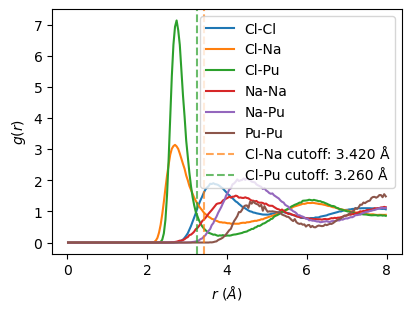

In [7]:
plot_rdfs(result["rdf"], cutoffs=cutoffs)

In [8]:
from bondmodifier_utils import build_shared_anion_graph

In [9]:
# sizes, cluster_ids, G = build_shared_anion_graph(result["data"], result["names"], anion="Cl", metals=["Pu"])

Clusters: 106 | Largest: 63 | Avg: 3.62


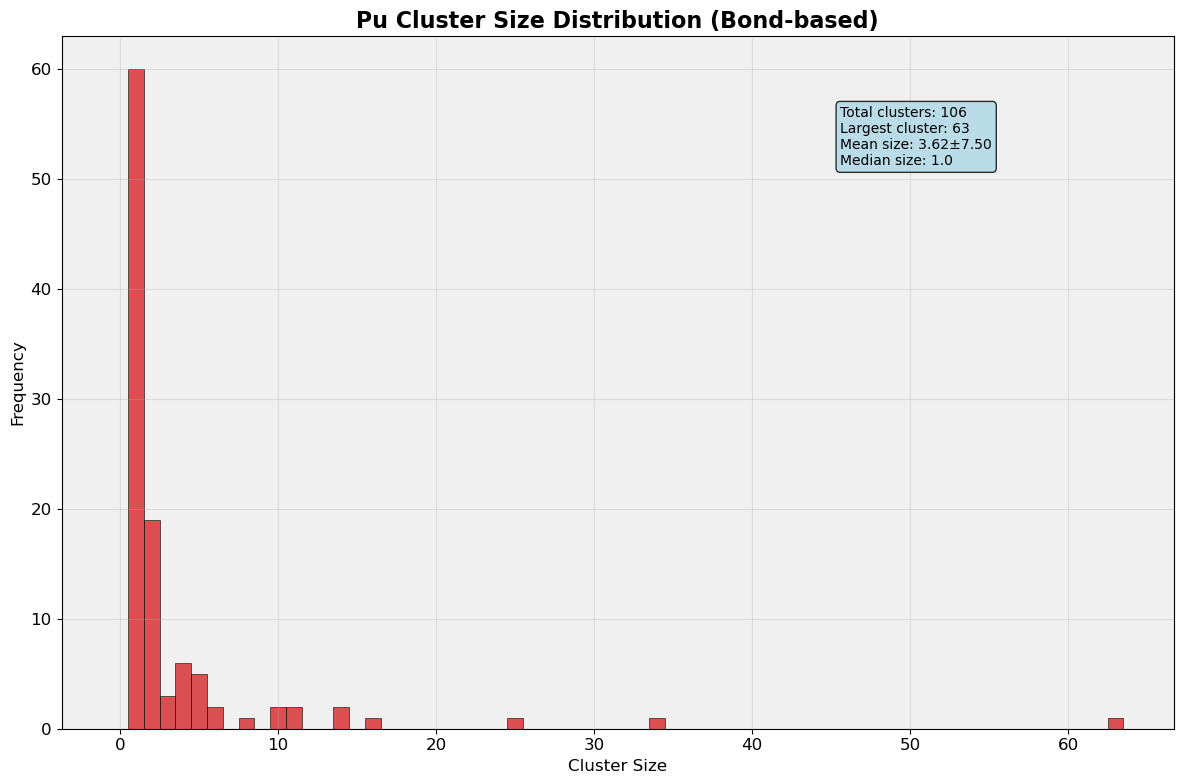

Bond counts: {'Cl-Pu': 2266, 'Cl-Na': 4451}


In [10]:
# Unpack results and analyze using standardized plotting
names = result["names"]
sizes = result["sizes"]
cluster_ids = result["cluster_ids"]
data0 = result["data"]
G = result["graph"]

print(f"Clusters: {len(sizes)} | Largest: {np.max(sizes) if len(sizes)>0 else 0} | Avg: {np.mean(sizes) if len(sizes)>0 else 0:.2f}")

# Plot standardized cluster size distribution
std_plot_cluster_size_distribution(sizes, title="Pu Cluster Size Distribution (Bond-based)")

# Bond summary
counts = summarize_bonds(data0, names)
print("Bond counts:", counts)



In [11]:
result["sizes"]


array([ 5,  5, 63,  1,  1,  2, 11,  2, 14, 10,  3,  1,  8,  2,  1, 11,  4,
        1,  2,  1,  2,  1,  1,  3,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  2,  1,  2, 34,  1,  2,  1, 16,  1,  1,  1,  1,  2,  1,  1,  1,
        1,  1,  1,  1,  2,  6,  1,  2,  2, 14, 25,  2,  5,  1,  6,  5,  1,
        1,  4,  1,  2,  1,  4,  2,  1,  1,  1,  4,  2,  1,  1,  1,  1,  4,
        1, 10,  4,  1,  2,  1,  1,  1,  3,  5,  1,  1,  2,  1,  1,  1,  1,
        1,  1,  1,  1])

In [12]:
from plot_utils import plot_3d_graph_components_pu_only

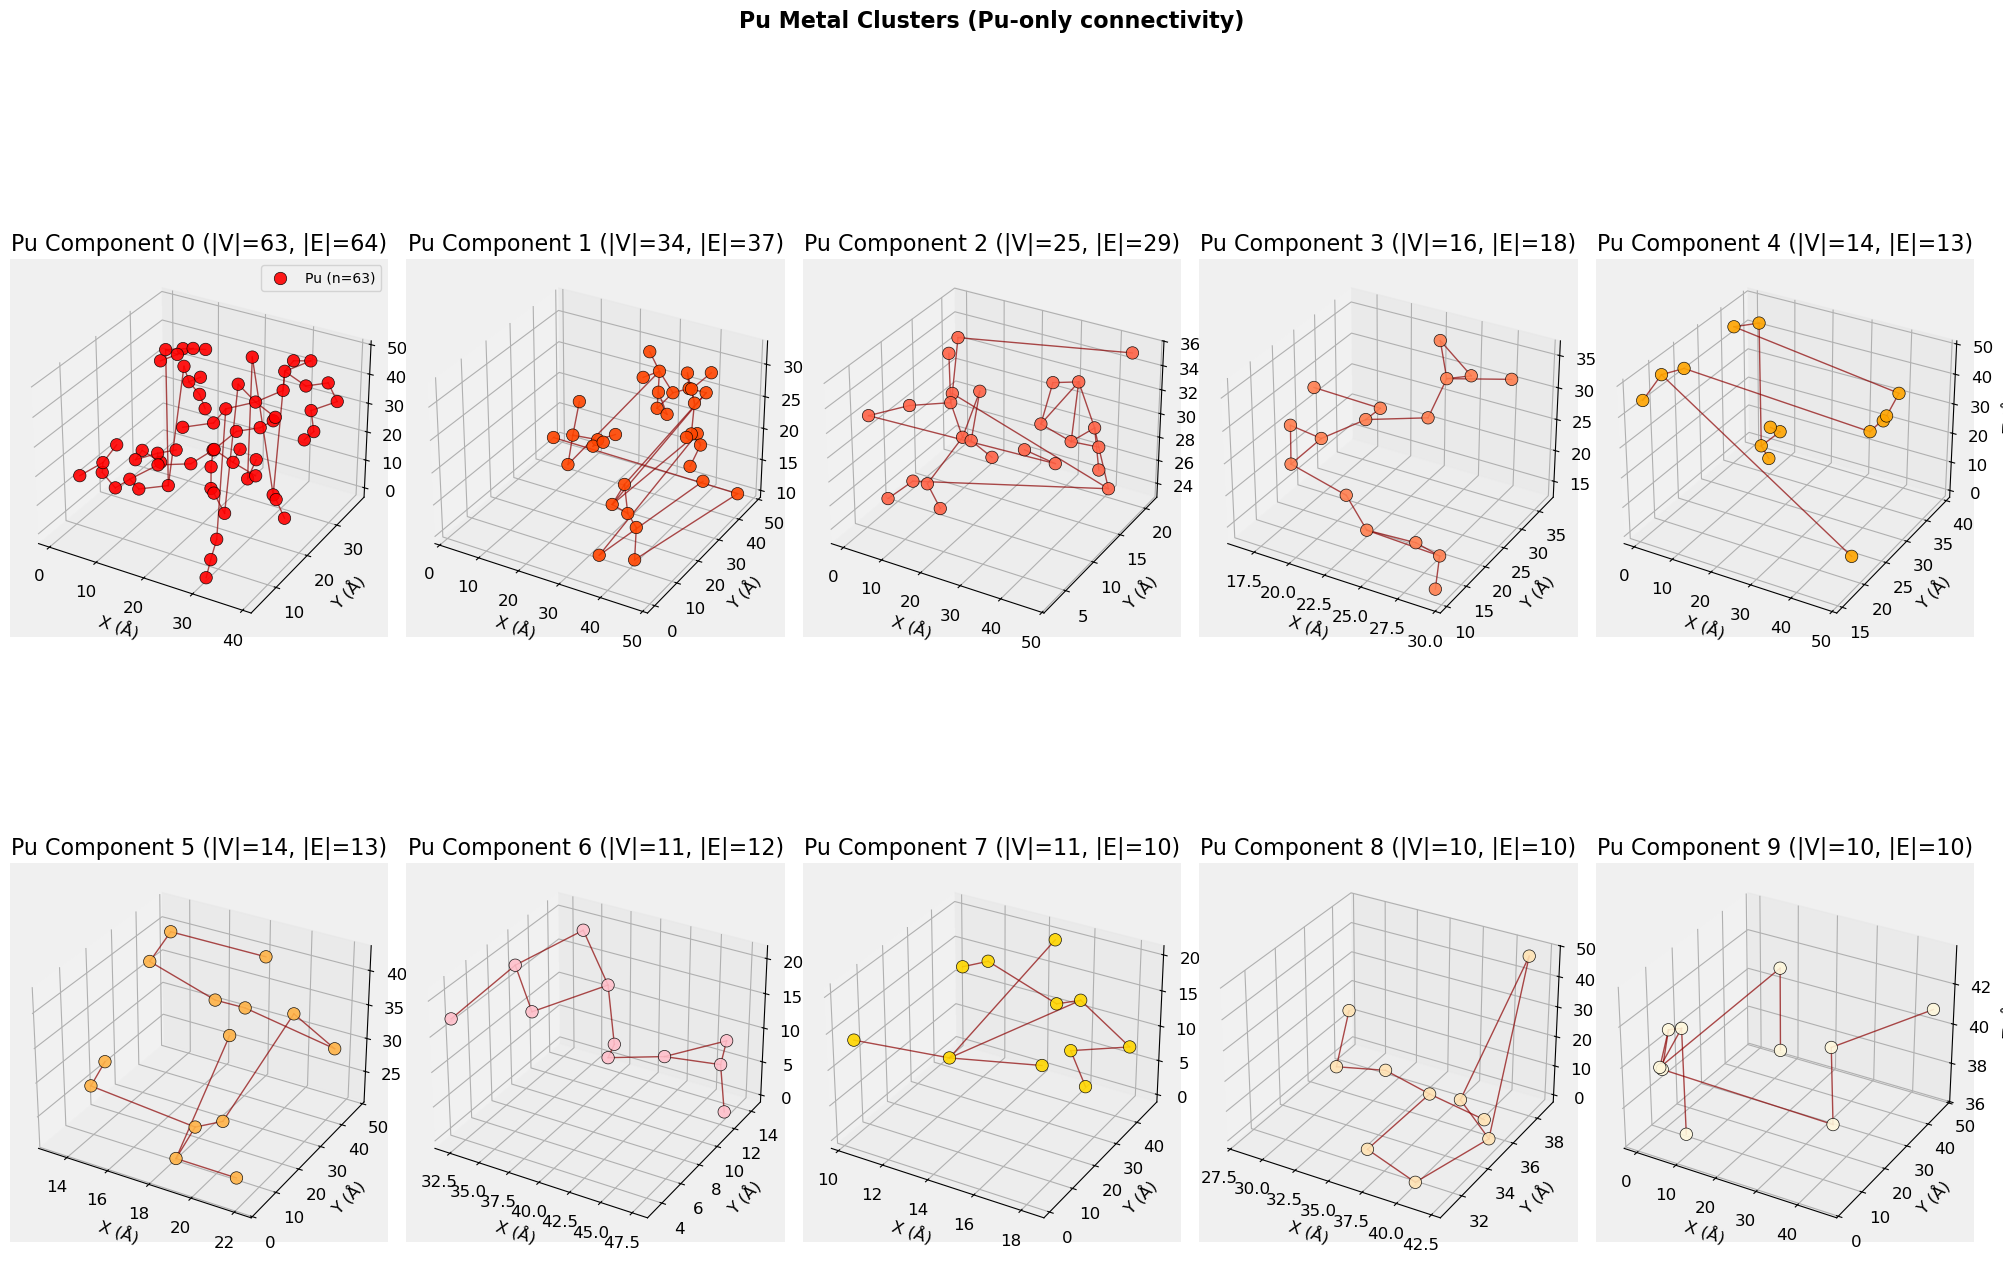

In [13]:
# 3D visualization using standardized plotting functions
plot_3d_graph_components_pu_only(G, data=data0, names=names, max_components=10)

Computing heatmap with 21 x 21 = 441 points...


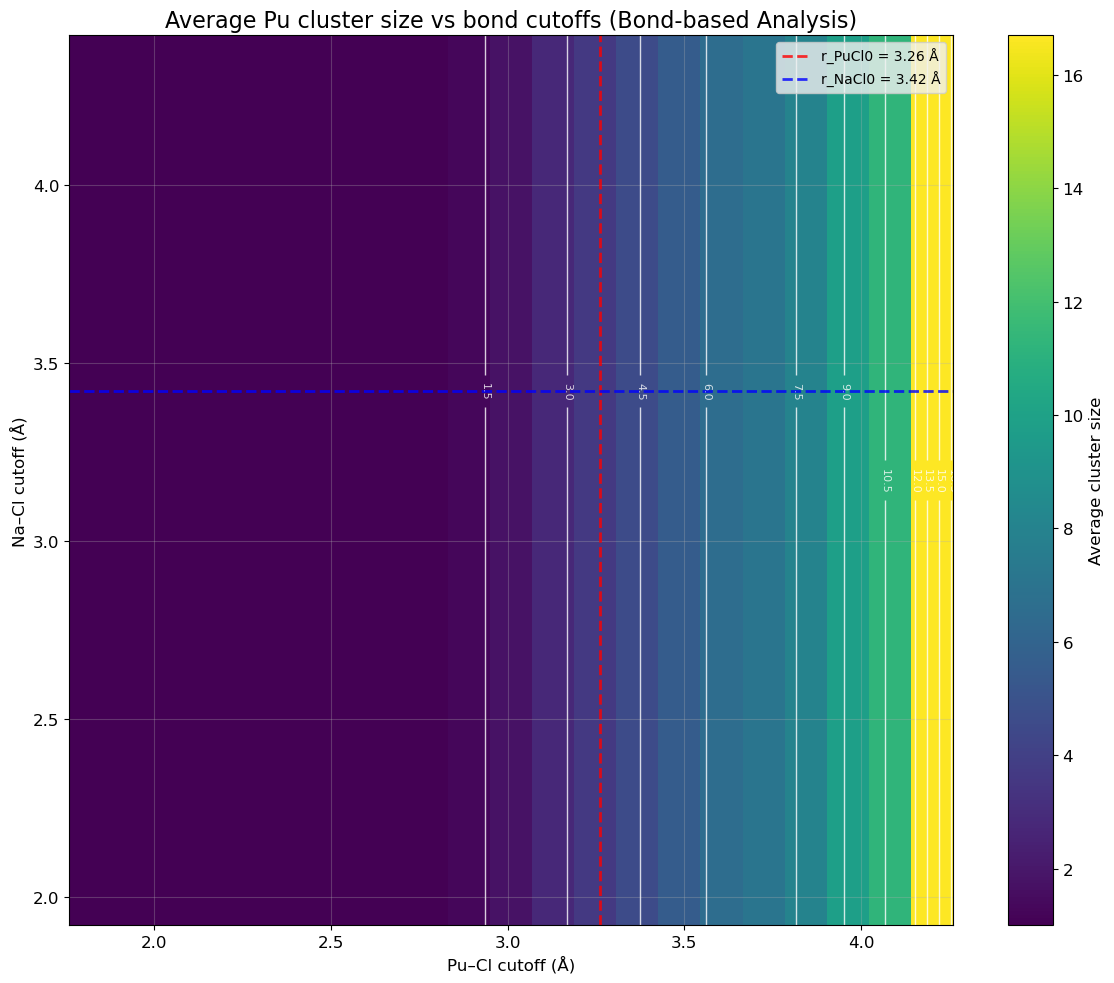

Heatmap Summary:
  Pu-Cl range: 1.76 to 4.26 Å
  Na-Cl range: 1.92 to 4.42 Å
  Min average cluster size: 1.00
  Max average cluster size: 16.70
  Original cutoffs: Pu-Cl=3.26 Å, Na-Cl=3.42 Å


In [14]:
def plot_cluster_size_heatmap_vs_cutoffs(pipe, names, cutoffs, title_suffix=""):
    """
    Plot average cluster size heatmap vs Na-Cl and Pu-Cl cutoffs.
    
    This function creates a heatmap showing how average cluster size changes
    with different bond cutoff values, without modifying global variables.
    
    Args:
        pipe: OVITO pipeline object
        names: Array of atom names/types
        cutoffs: Dictionary of current cutoff values
        title_suffix: Optional suffix for the plot title
    """
    import numpy as np
    import matplotlib.pyplot as plt
    from bondmodifier_utils import configure_bonds_modifier_from_cutoffs, build_shared_anion_graph
    
    # Create a copy of the pipeline to avoid modifying the original
    pipe_copy = pipe
    
    # Define sweep ranges around the RDF-derived cutoffs
    r_PuCl0 = float(cutoffs.get(("Pu","Cl"), cutoffs.get("Pu-Cl", 3.5)))
    r_NaCl0 = float(cutoffs.get(("Na","Cl"), cutoffs.get("Na-Cl", 3.8)))
    
    r_PuCl_vals = np.linspace(max(0.5, r_PuCl0 - 1.5), r_PuCl0 + 1.0, 21)
    r_NaCl_vals = np.linspace(max(0.5, r_NaCl0 - 1.5), r_NaCl0 + 1.0, 21)
    
    heat = np.zeros((len(r_NaCl_vals), len(r_PuCl_vals)), float)
    
    print(f"Computing heatmap with {len(r_PuCl_vals)} x {len(r_NaCl_vals)} = {len(r_PuCl_vals) * len(r_NaCl_vals)} points...")
    
    for i, r_NaCl in enumerate(r_NaCl_vals):
        for j, r_PuCl in enumerate(r_PuCl_vals):
            # Configure bond cutoffs; mirror symmetric pairs
            pair_cutoffs = {
                ("Pu","Cl"): float(r_PuCl), ("Cl","Pu"): float(r_PuCl),
                ("Na","Cl"): float(r_NaCl), ("Cl","Na"): float(r_NaCl),
            }
            configure_bonds_modifier_from_cutoffs(pipe_copy, pair_cutoffs)
            data_temp = pipe_copy.compute(0)
            # Build shared-anion connectivity among Pu atoms only
            sizes_temp, cluster_ids_temp, G_temp = build_shared_anion_graph(data_temp, names, anion="Cl", metals=["Pu"])
            heat[i, j] = float(np.mean(sizes_temp)) if len(sizes_temp) > 0 else 0.0
    
    # Create the plot
    plt.figure(figsize=(12, 10))
    im = plt.imshow(heat, origin='lower', aspect='auto',
                    extent=[r_PuCl_vals[0], r_PuCl_vals[-1], r_NaCl_vals[0], r_NaCl_vals[-1]],
                    cmap='viridis')
    plt.colorbar(im, label='Average cluster size')
    
    # Add contour lines with cluster size labels
    X, Y = np.meshgrid(r_PuCl_vals, r_NaCl_vals)
    contours = plt.contour(X, Y, heat, levels=10, colors='white', alpha=0.8, linewidths=1)
    plt.clabel(contours, fontsize=8, fmt='%.1f')
    
    # Add reference lines for original cutoff values
    plt.axvline(r_PuCl0, color='red', linestyle='--', linewidth=2, alpha=0.8, label=f'r_PuCl0 = {r_PuCl0:.2f} Å')
    plt.axhline(r_NaCl0, color='blue', linestyle='--', linewidth=2, alpha=0.8, label=f'r_NaCl0 = {r_NaCl0:.2f} Å')
    plt.legend()
    
    plt.xlabel('Pu–Cl cutoff (Å)')
    plt.ylabel('Na–Cl cutoff (Å)')
    plt.title(f'Average Pu cluster size vs bond cutoffs{title_suffix}')
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print(f"Heatmap Summary:")
    print(f"  Pu-Cl range: {r_PuCl_vals[0]:.2f} to {r_PuCl_vals[-1]:.2f} Å")
    print(f"  Na-Cl range: {r_NaCl_vals[0]:.2f} to {r_NaCl_vals[-1]:.2f} Å")
    print(f"  Min average cluster size: {np.min(heat):.2f}")
    print(f"  Max average cluster size: {np.max(heat):.2f}")
    print(f"  Original cutoffs: Pu-Cl={r_PuCl0:.2f} Å, Na-Cl={r_NaCl0:.2f} Å")
    
    return heat, r_PuCl_vals, r_NaCl_vals

# Call the function to generate the heatmap
heatmap_data = plot_cluster_size_heatmap_vs_cutoffs(pipe, names, cutoffs, " (Bond-based Analysis)")


STANDARDIZED PLOTTING FUNCTIONS DEMONSTRATION

1. CLUSTER SIZE DISTRIBUTION ANALYSIS
----------------------------------------


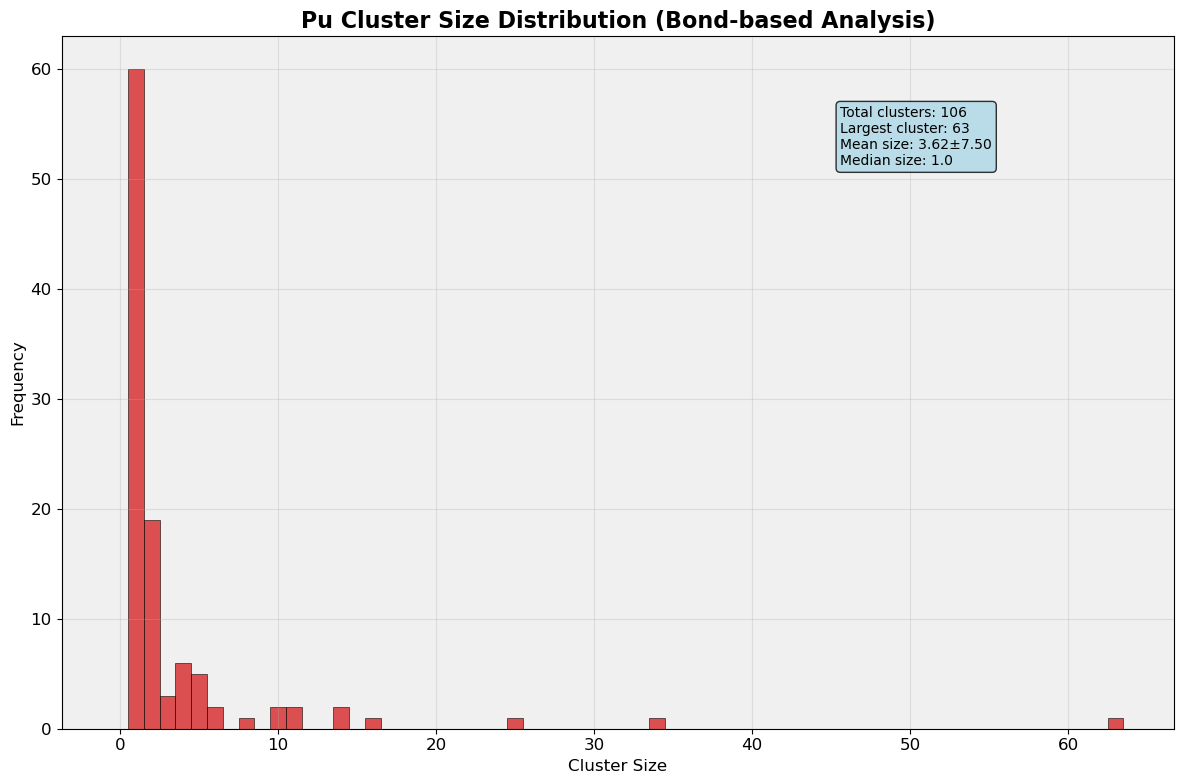

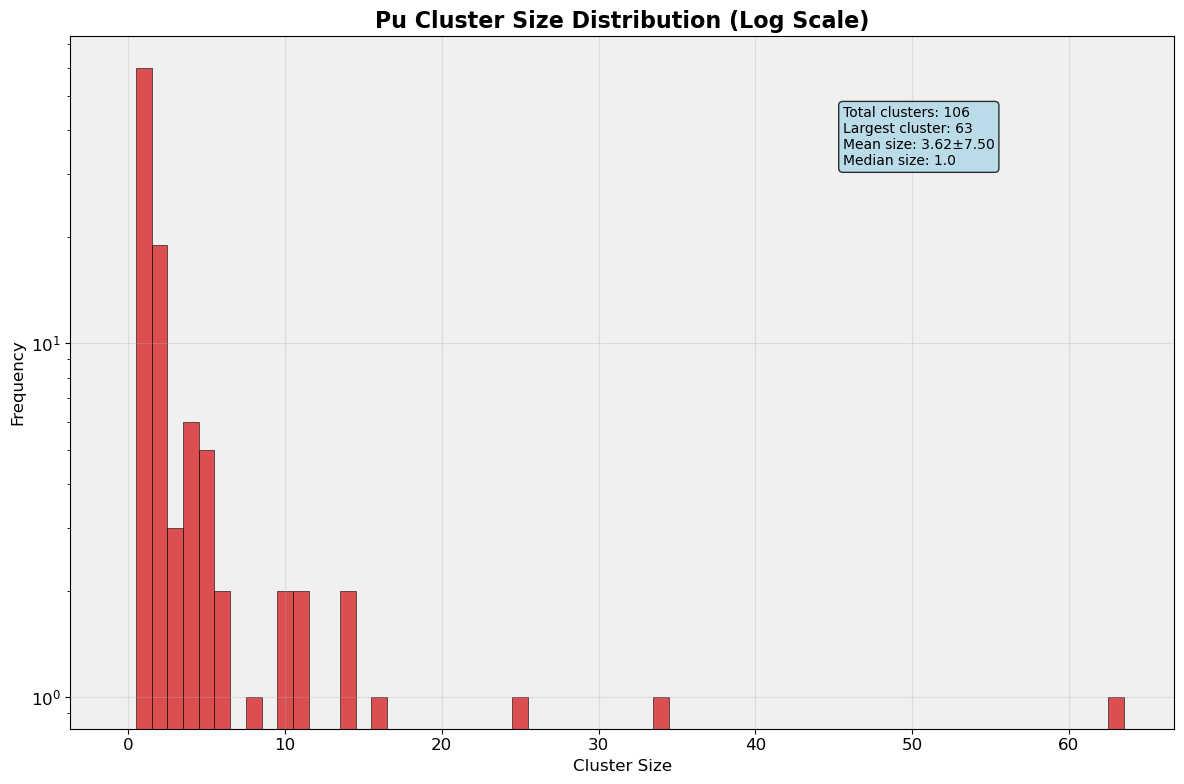

Cluster Statistics:
  Total clusters: 106
  Largest cluster: 63
  Average cluster size: 3.62
  Median cluster size: 1.0
  Standard deviation: 7.50

2. GRAPH STRUCTURE VISUALIZATION
----------------------------------------


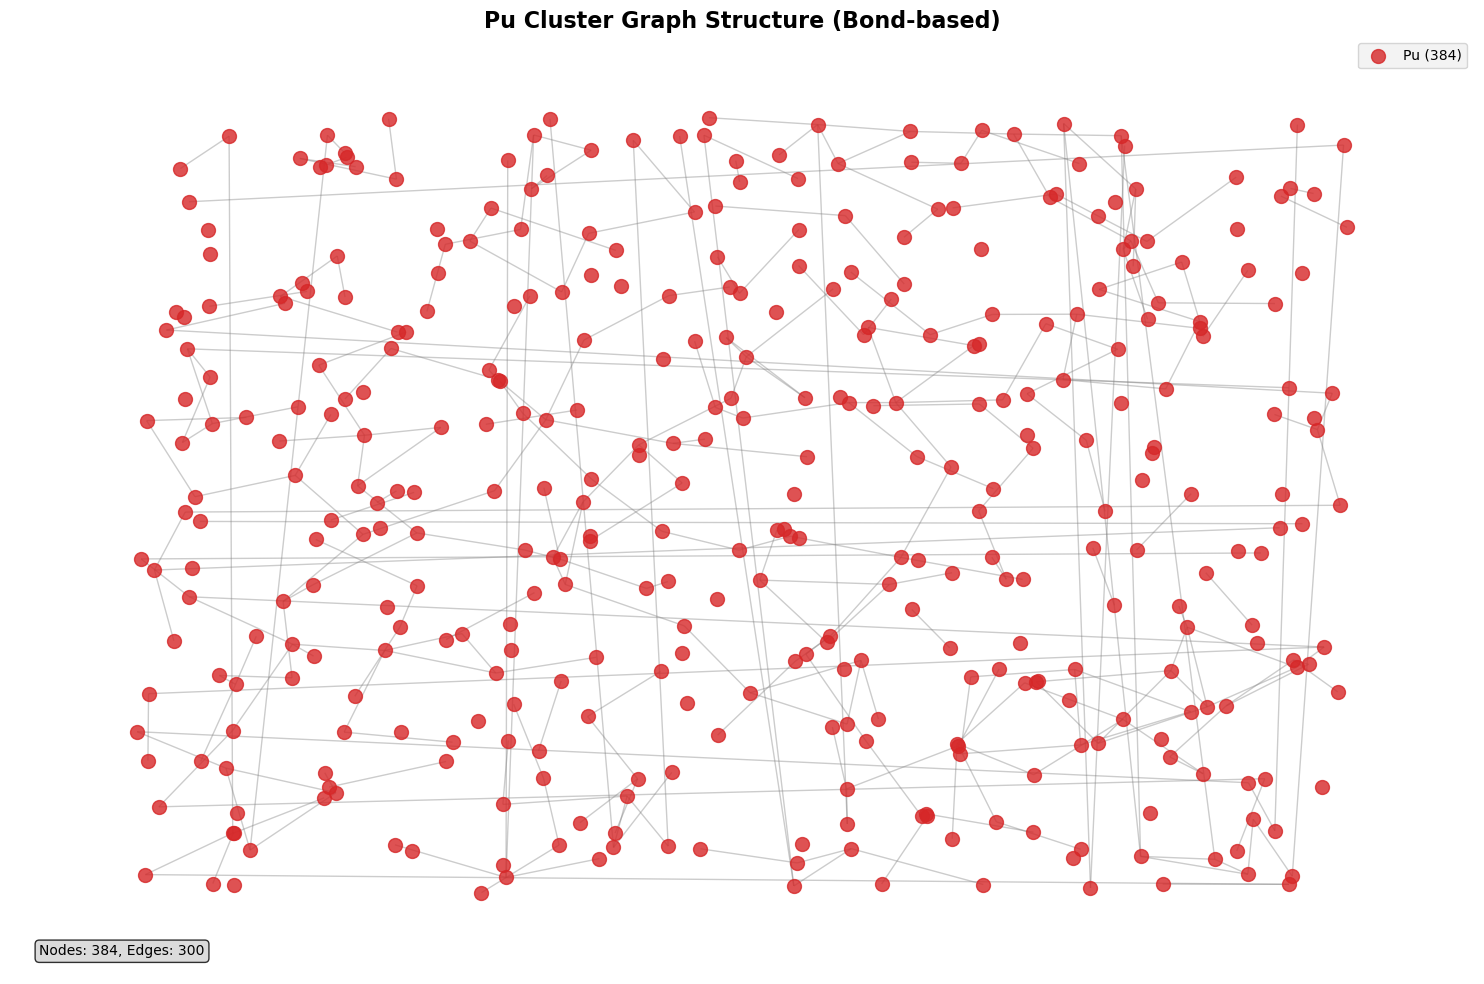

Graph Properties:
  Nodes: 384
  Edges: 300
  Density: 0.0041
  Connected components: 106

3. 3D GRAPH COMPONENTS VISUALIZATION
----------------------------------------


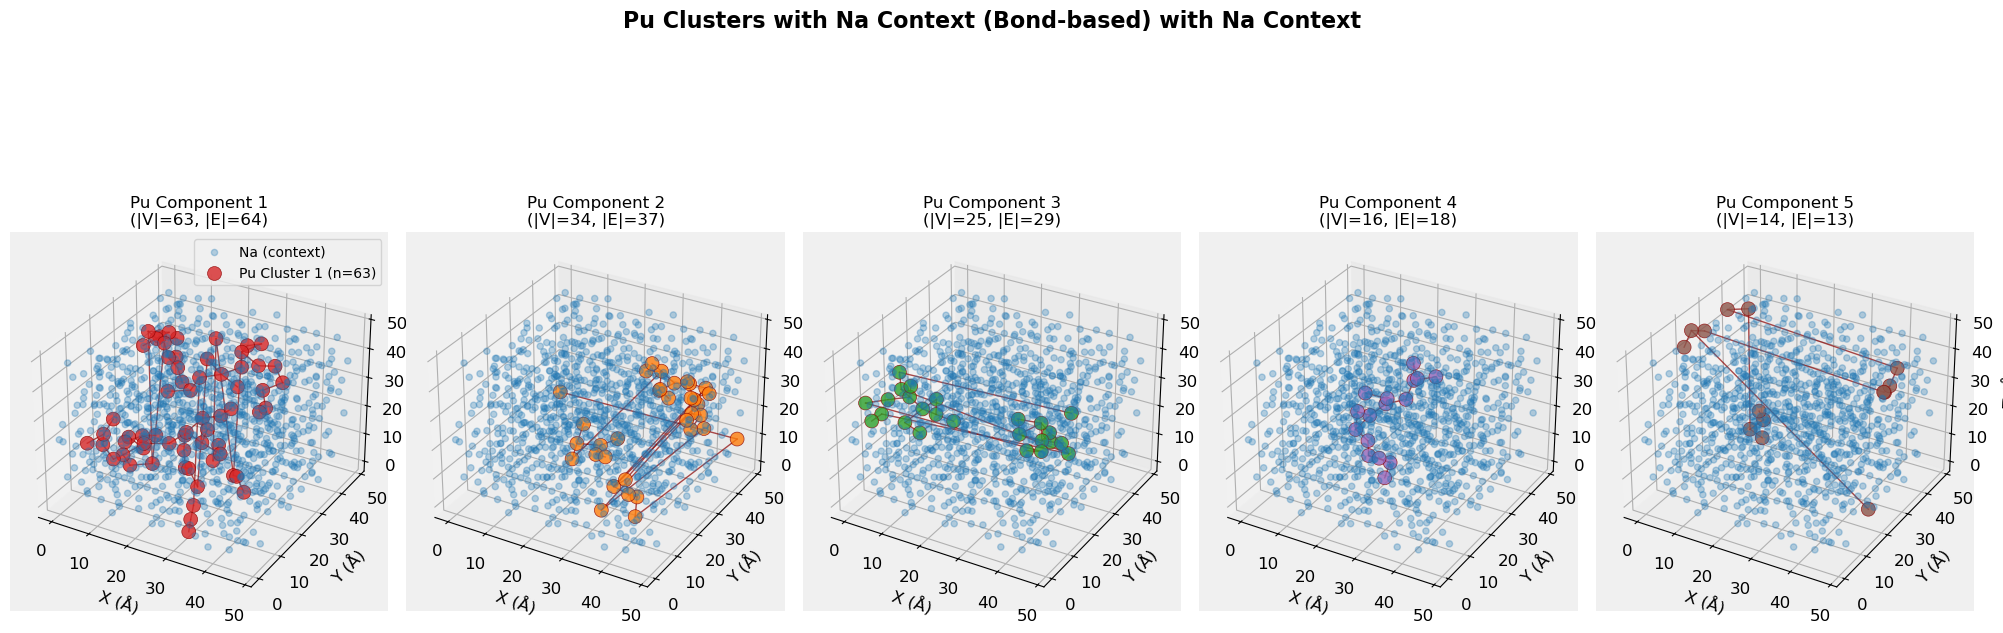

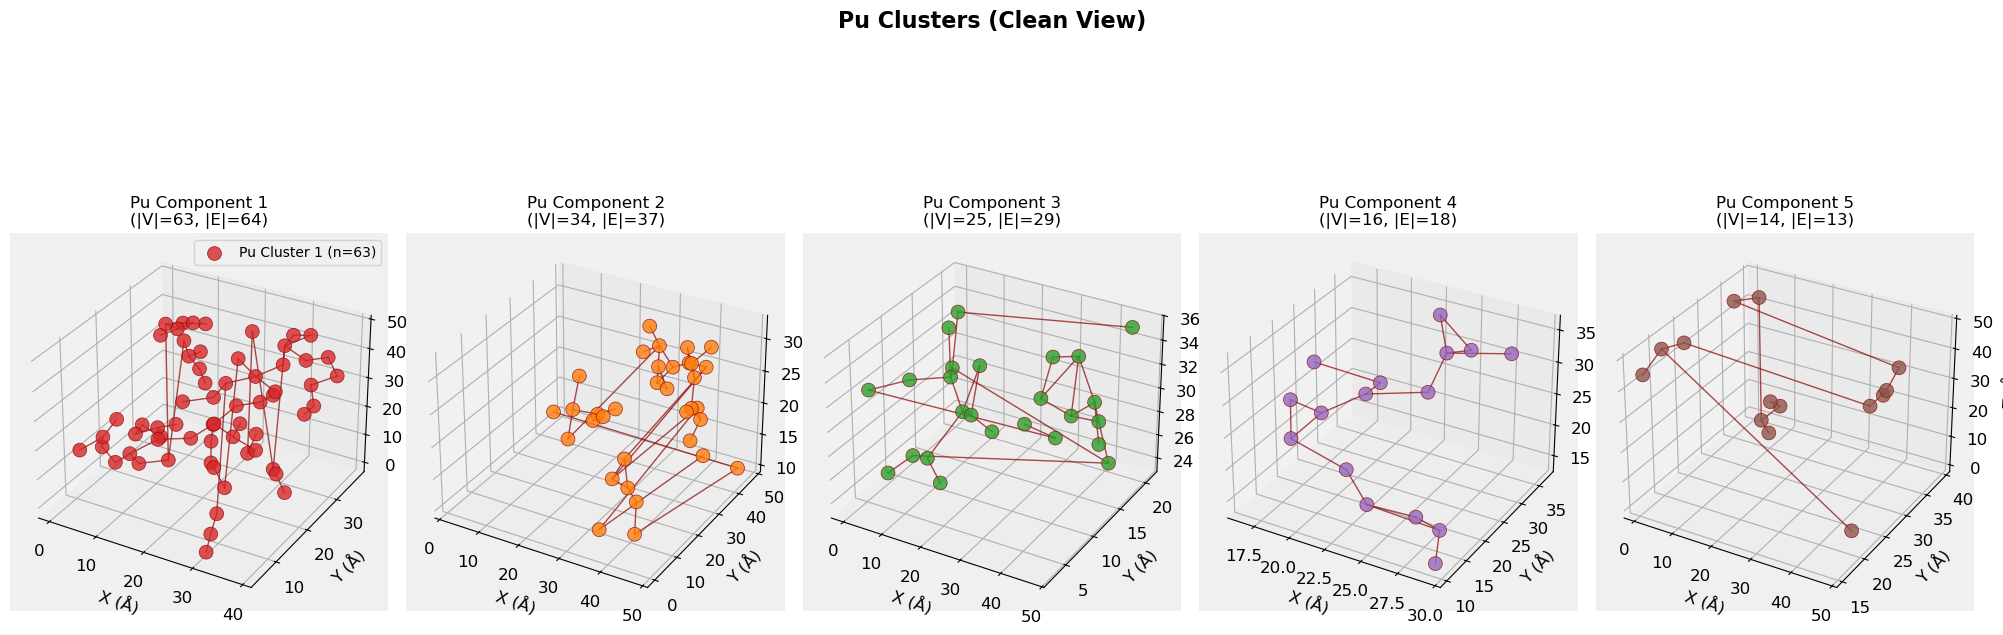


STANDARDIZED PLOTTING DEMONSTRATION COMPLETE


In [15]:
# Comprehensive Standardized Plotting Functions Demonstration
print("=" * 60)
print("STANDARDIZED PLOTTING FUNCTIONS DEMONSTRATION")
print("=" * 60)

# 1. Cluster Size Distribution Analysis
print("\n1. CLUSTER SIZE DISTRIBUTION ANALYSIS")
print("-" * 40)
if len(sizes) > 0:
    # Standard cluster size distribution
    std_plot_cluster_size_distribution(
        sizes, 
        title="Pu Cluster Size Distribution (Bond-based Analysis)",
        log_scale=False
    )
    
    # Log scale version for better visualization of small clusters
    std_plot_cluster_size_distribution(
        sizes, 
        title="Pu Cluster Size Distribution (Log Scale)",
        log_scale=True
    )
    
    print(f"Cluster Statistics:")
    print(f"  Total clusters: {len(sizes)}")
    print(f"  Largest cluster: {max(sizes)}")
    print(f"  Average cluster size: {np.mean(sizes):.2f}")
    print(f"  Median cluster size: {np.median(sizes):.1f}")
    print(f"  Standard deviation: {np.std(sizes):.2f}")
else:
    print("No clusters found for size distribution analysis")

# 2. Graph Structure Visualization
print("\n2. GRAPH STRUCTURE VISUALIZATION")
print("-" * 40)
if G.number_of_nodes() > 0:
    plot_graph_structure(
        G, 
        title="Pu Cluster Graph Structure (Bond-based)",
        show_edges=True,
        show_labels=False
    )
    
    print(f"Graph Properties:")
    print(f"  Nodes: {G.number_of_nodes()}")
    print(f"  Edges: {G.number_of_edges()}")
    print(f"  Density: {nx.density(G):.4f}")
    print(f"  Connected components: {nx.number_connected_components(G)}")
else:
    print("No graph structure available for visualization")

# 3. 3D Graph Components Visualization
print("\n3. 3D GRAPH COMPONENTS VISUALIZATION")
print("-" * 40)
if G.number_of_nodes() > 0:
    # Pu-only components with Na context
    std_plot_3d_graph_components_pu_only(
        G, 
        data=data0, 
        names=names, 
        max_components=5, 
        show_na_context=True,
        title="Pu Clusters with Na Context (Bond-based)"
    )
    
    # Pu-only components without Na context for cleaner view
    std_plot_3d_graph_components_pu_only(
        G, 
        data=data0, 
        names=names, 
        max_components=5, 
        show_na_context=False,
        title="Pu Clusters (Clean View)"
    )
else:
    print("No graph components available for 3D visualization")

print("\n" + "=" * 60)
print("STANDARDIZED PLOTTING DEMONSTRATION COMPLETE")
print("=" * 60)


In [16]:
# Quick Access Plotting Functions
# Use these functions for quick plotting without running the full demonstration

def quick_cluster_size_plot(sizes_list, title_suffix=""):
    """Quick cluster size distribution plot"""
    std_plot_cluster_size_distribution(
        sizes_list, 
        title=f"Pu Cluster Size Distribution{title_suffix}",
        log_scale=False
    )

def quick_graph_structure_plot(graph, title_suffix=""):
    """Quick graph structure plot"""
    plot_graph_structure(
        graph, 
        title=f"Pu Graph Structure{title_suffix}",
        show_edges=True,
        show_labels=False
    )

def quick_3d_components_plot(graph, data, names, max_comp=6, show_na=True, title_suffix=""):
    """Quick 3D components plot"""
    std_plot_3d_graph_components_pu_only(
        graph, 
        data=data, 
        names=names, 
        max_components=max_comp, 
        show_na_context=show_na,
        title=f"Pu Clusters{title_suffix}"
    )

def quick_all_plots():
    """Run all quick plots with current data"""
    print("Running all quick plots...")
    
    if len(sizes) > 0:
        quick_cluster_size_plot(sizes, " (Bond-based)")
    
    if G.number_of_nodes() > 0:
        quick_graph_structure_plot(G, " (Bond-based)")
        quick_3d_components_plot(G, data0, names, 6, True, " (Bond-based)")

# Example usage:
# quick_cluster_size_plot(sizes, " (Custom Title)")
# quick_graph_structure_plot(G, " (Custom Title)")
# quick_3d_components_plot(G, data0, names, 6, True, " (Custom Title)")
# quick_all_plots()  # Run all plots at once


# Standardized Plotting Functions Summary

This notebook now includes comprehensive standardized plotting functions for Pu cluster analysis:

## Available Plotting Functions

### 1. **Cluster Size Distribution**
- `plot_cluster_size_distribution()` - Standardized histogram with statistics
- `quick_cluster_size_plot()` - Quick access version
- Features: Log scale option, comprehensive statistics, professional styling

### 2. **Graph Structure Visualization**
- `plot_graph_structure()` - 2D graph visualization with species coloring
- `quick_graph_structure_plot()` - Quick access version
- Features: Species-colored nodes, optional edges/labels, summary statistics

### 3. **3D Graph Components**
- `plot_3d_graph_components()` - General 3D component visualization
- `plot_3d_graph_components_pu_only()` - Pu-specific with Na context
- `quick_3d_components_plot()` - Quick access version
- Features: Multiple subplots, area-based edge widths, optional Na context

### 4. **Coordination Histograms**
- `plot_coordination_histograms()` - Standardized coordination analysis
- Features: Error bars, mean lines, statistical summaries

## Usage Examples

```python
# Individual plots
quick_cluster_size_plot(sizes, " (Custom Analysis)")
quick_graph_structure_plot(G, " (Custom Analysis)")
quick_3d_components_plot(G, data0, names, 6, True, " (Custom Analysis)")

# Run all plots at once
quick_all_plots()
```

## Benefits
- **Consistent styling** across all notebooks
- **Professional appearance** suitable for publications
- **Robust error handling** prevents plotting failures
- **Easy customization** with optional parameters
- **Comprehensive statistics** automatically included


In [ ]:
# Sanity check: Count atoms of each type
print("=" * 60)
print("ATOM COUNT SANITY CHECK")
print("=" * 60)

# Count atoms by species
from collections import Counter
atom_counts = Counter(names)

print("Atom counts by species:")
for species, count in sorted(atom_counts.items()):
    print(f"  {species}: {count:,} atoms")

print(f"\nTotal atoms: {len(names):,}")

# Verify this matches the coordination analysis sample sizes
print("\nCoordination analysis sample sizes:")
print("(These should match the atom counts above)")

# Check if we have the coord_data from previous analysis
if 'coord_data' in locals():
    for central_species in ['Pu', 'Na', 'Cl']:
        if central_species in coord_data:
            # Get the first neighbor species to check sample size
            first_neighbor = next(iter(coord_data[central_species].values()))
            sample_size = len(first_neighbor)
            expected_size = atom_counts.get(central_species, 0)
            match_status = "✓" if sample_size == expected_size else "✗"
            print(f"  {central_species}: n={sample_size} (expected: {expected_size}) {match_status}")
else:
    print("  Run coordination analysis first to see sample size verification")

# Additional system information
print(f"\nSystem information:")
print(f"  Frame: {pipe.source.num_frames} total frames")
print(f"  Current frame: 0 (first frame)")
print(f"  Box dimensions: {data0.cell.matrix}")

# Composition analysis
total_atoms = len(names)
print(f"\nComposition (mole fractions):")
for species, count in sorted(atom_counts.items()):
    mole_fraction = count / total_atoms
    print(f"  {species}: {mole_fraction:.4f} ({count/total_atoms*100:.2f}%)")

print("=" * 60)


In [18]:
cutoffs


{('Pu', 'Cl'): 3.2600000000000002,
 ('Cl', 'Pu'): 3.2600000000000002,
 ('Na', 'Cl'): 3.42,
 ('Cl', 'Na'): 3.42}

BOND-BASED COORDINATION HISTOGRAM ANALYSIS
Analyzing coordination for species: [np.str_('Cl'), np.str_('Na'), np.str_('Pu')]

Plotting coordination histogram for Pu:
[np.str_('Cl'), np.str_('Na'), np.str_('Pu')]
Pu-Cl: 5.42 ± 1.11 (n=384)
Pu-Na: 0.68 ± 0.78 (n=384)
Pu-Pu: 0.03 ± 0.17 (n=384)


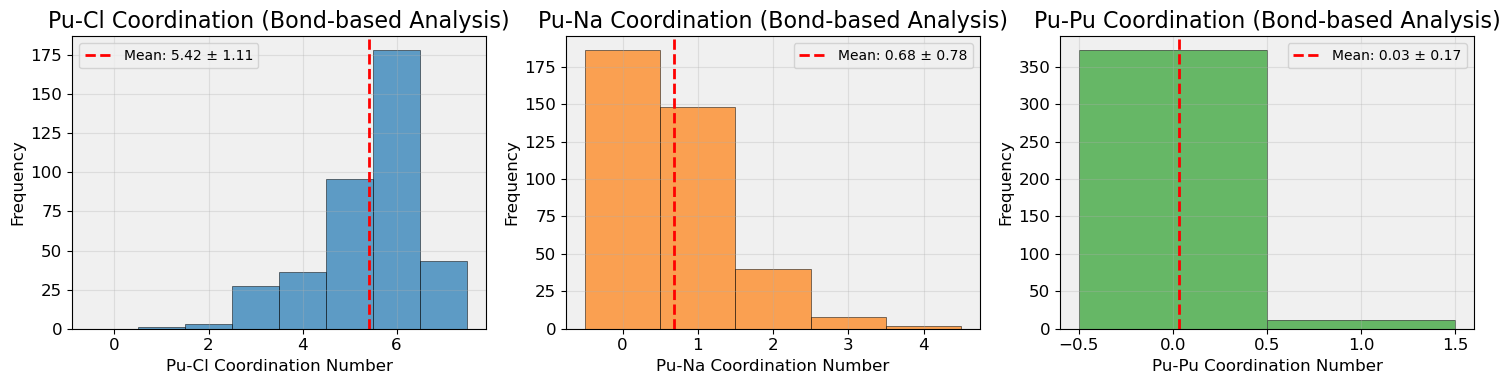


Plotting coordination histogram for Na:
[np.str_('Cl'), np.str_('Na'), np.str_('Pu')]
Na-Cl: 3.97 ± 1.12 (n=1024)
Na-Na: 1.19 ± 1.02 (n=1024)
Na-Pu: 0.25 ± 0.46 (n=1024)


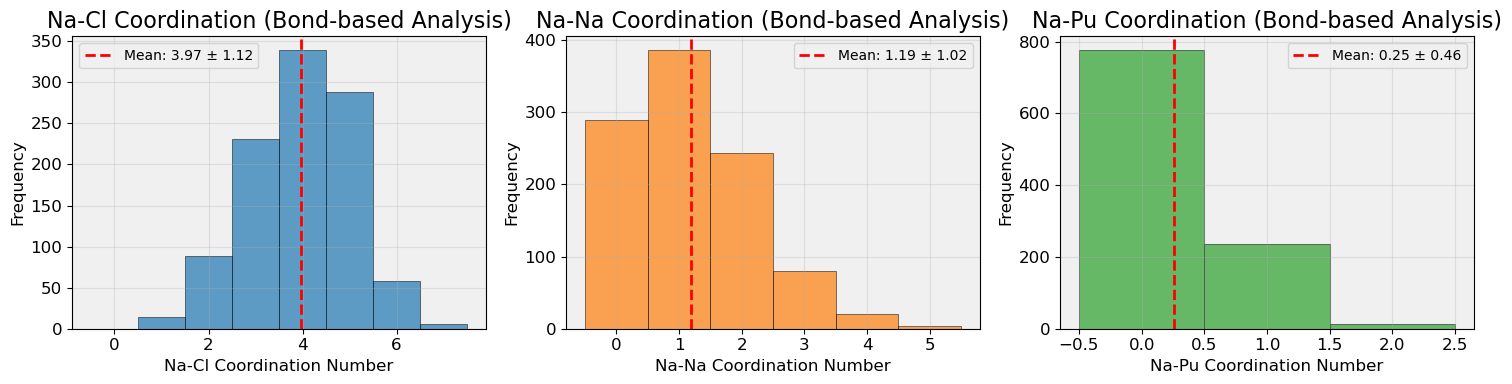


Plotting coordination histogram for Cl:
[np.str_('Cl'), np.str_('Na'), np.str_('Pu')]
Cl-Cl: 4.10 ± 1.57 (n=2176)
Cl-Na: 1.87 ± 1.08 (n=2176)
Cl-Pu: 0.96 ± 0.59 (n=2176)


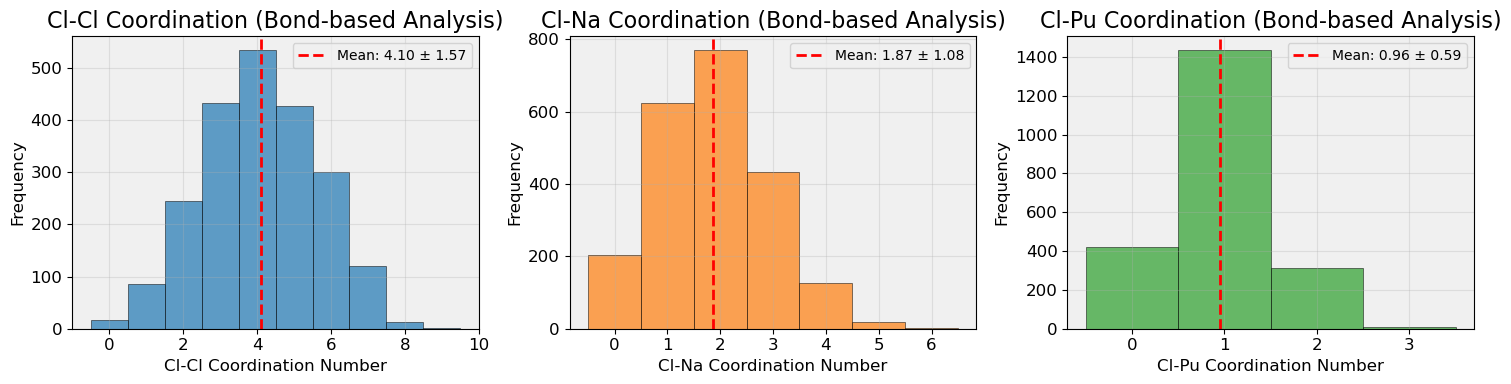


BOND-BASED COORDINATION ANALYSIS COMPLETE


In [21]:
def analyze_bond_coordination(data, names, pair_cutoffs=None):
    """
    Analyze coordination using bond-based analysis (similar to analyze_voronoi_coordination).
    
    This function computes neighbor-count distributions by species using bond cutoffs
    instead of Voronoi tessellation, making it suitable for bond-based cluster analysis.
    
    Parameters:
        data: OVITO data object containing particle information
        names: Array of atom names/types
        pair_cutoffs: Dictionary of bond cutoffs for different species pairs
    
    Returns:
        dict: Coordination data organized by central species and neighbor species
    """
    import numpy as np
    from collections import defaultdict
    
    # Get unique species
    unique_species = sorted(list(set(names)))
    print(f"Analyzing coordination for species: {unique_species}")
    
    # Initialize coordination data structure
    coord_data = {sp_c: {sp_n: [] for sp_n in unique_species} for sp_c in unique_species}
    
    # Get positions and create species mapping
    positions = data.particles.positions[:]
    species_idx = {sp: i for i, sp in enumerate(unique_species)}
    
    # Create species array for each atom
    atom_species = np.array([species_idx[name] for name in names])
    
    # Calculate coordination for each atom
    for i, (pos_i, sp_i) in enumerate(zip(positions, names)):
        neighbors = []
        
        # Find neighbors within cutoff distance
        for j, (pos_j, sp_j) in enumerate(zip(positions, names)):
            if i == j:
                continue
                
            # Calculate distance
            dist = np.linalg.norm(pos_j - pos_i)
            
            # Check if within cutoff (use default or specific pair cutoff)
            if pair_cutoffs:
                cutoff_key = (sp_i, sp_j)
                if cutoff_key in pair_cutoffs:
                    cutoff = pair_cutoffs[cutoff_key]
                else:
                    # Use default cutoff if specific pair not found
                    cutoff = 4.0  # Default cutoff
            else:
                cutoff = 4.0  # Default cutoff
                
            if dist <= cutoff:
                neighbors.append(sp_j)
        
        # Store coordination counts
        for neighbor_sp in unique_species:
            count = neighbors.count(neighbor_sp)
            coord_data[sp_i][neighbor_sp].append(count)
    
    return coord_data

def plot_bond_coordination_histograms(coord_data, central_species, title_suffix=""):
    """
    Plot coordination histograms for bond-based analysis.
    
    Parameters:
        coord_data: Coordination data from analyze_bond_coordination
        central_species: Species to plot coordination for
        title_suffix: Optional suffix for plot title
    """
    import matplotlib.pyplot as plt
    import numpy as np
    
    if central_species not in coord_data:
        print(f"No coordination data found for species: {central_species}")
        return
    
    # Get coordination data for the central species
    species_data = coord_data[central_species]
    
    # Filter out empty neighbor species
    neighbor_species = [sp for sp, counts in species_data.items() if counts and any(counts)]
    print(neighbor_species)
    
    if not neighbor_species:
        print(f"No coordination data found for {central_species}")
        return
    
    # Create subplots
    n_neighbors = len(neighbor_species)
    fig, axes = plt.subplots(1, n_neighbors, figsize=(5*n_neighbors, 4))
    if n_neighbors == 1:
        axes = [axes]
    
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
    
    for idx, neighbor_sp in enumerate(neighbor_species):
        counts = species_data[neighbor_sp]
        
        if not counts:
            continue
            
        # Create histogram
        max_coord = max(counts) if counts else 0
        bins = np.arange(0, max_coord + 2) - 0.5
        
        axes[idx].hist(counts, bins=bins, alpha=0.7, color=colors[idx % len(colors)], 
                      edgecolor='black', linewidth=0.5)
        
        # Add statistics
        mean_coord = np.mean(counts)
        std_coord = np.std(counts)
        axes[idx].axvline(mean_coord, color='red', linestyle='--', linewidth=2, 
                         label=f'Mean: {mean_coord:.2f} ± {std_coord:.2f}')
        
        axes[idx].set_xlabel(f'{central_species}-{neighbor_sp} Coordination Number')
        axes[idx].set_ylabel('Frequency')
        axes[idx].set_title(f'{central_species}-{neighbor_sp} Coordination{title_suffix}')
        axes[idx].legend()
        axes[idx].grid(True, alpha=0.3)
        
        # Print statistics
        print(f'{central_species}-{neighbor_sp}: {mean_coord:.2f} ± {std_coord:.2f} (n={len(counts)})')
    
    plt.tight_layout()
    plt.show()

# Test the coordination analysis with current data
print("=" * 60)
print("BOND-BASED COORDINATION HISTOGRAM ANALYSIS")
print("=" * 60)

# Analyze coordination using bond cutoffs
coord_data = analyze_bond_coordination(data0, names, pair_cutoffs=cutoffs)

# Plot coordination histograms for each species
for species in ['Pu', 'Na', 'Cl']:
    if species in coord_data and any(any(counts) for counts in coord_data[species].values()):
        print(f"\nPlotting coordination histogram for {species}:")
        plot_bond_coordination_histograms(coord_data, species, " (Bond-based Analysis)")
    else:
        print(f"No coordination data available for {species}")

print("\n" + "=" * 60)
print("BOND-BASED COORDINATION ANALYSIS COMPLETE")
print("=" * 60)


In [22]:
coord_data

{np.str_('Cl'): {np.str_('Cl'): [2,
   2,
   3,
   1,
   2,
   3,
   4,
   2,
   3,
   1,
   4,
   4,
   3,
   2,
   0,
   4,
   3,
   0,
   2,
   3,
   4,
   1,
   3,
   2,
   1,
   5,
   4,
   2,
   2,
   1,
   1,
   5,
   1,
   4,
   2,
   3,
   3,
   2,
   2,
   2,
   3,
   3,
   2,
   3,
   2,
   3,
   5,
   2,
   5,
   3,
   3,
   3,
   3,
   5,
   3,
   5,
   5,
   1,
   3,
   4,
   4,
   3,
   5,
   1,
   3,
   3,
   5,
   4,
   2,
   4,
   4,
   5,
   3,
   2,
   1,
   4,
   1,
   6,
   5,
   5,
   3,
   6,
   3,
   1,
   3,
   6,
   6,
   5,
   4,
   2,
   5,
   5,
   2,
   5,
   3,
   6,
   4,
   3,
   4,
   5,
   5,
   7,
   4,
   2,
   3,
   1,
   3,
   4,
   4,
   4,
   4,
   3,
   4,
   4,
   4,
   4,
   3,
   4,
   1,
   0,
   5,
   2,
   2,
   1,
   4,
   1,
   4,
   2,
   8,
   4,
   6,
   3,
   4,
   3,
   6,
   6,
   3,
   4,
   3,
   2,
   4,
   3,
   5,
   3,
   5,
   7,
   3,
   1,
   3,
   2,
   2,
   6,
   3,
   7,
   4,
   4,
   4,
   4,
   1,
   4,
   2,
   1